In [1]:
#import libraries
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
#open King County House Data with pandas

kc_housing = pd.read_csv('kc_house_data.csv')

#data size: 21597 rows x 21 columns

In [3]:
kc_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
kc_housing = kc_housing.drop(columns = ['id','date','sqft_basement','zipcode', 'waterfront', 'yr_renovated'])

In [5]:
kc_housing.dropna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,2009,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,2014,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,2009,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,1600,2004,47.5345,-122.069,1410,1287


count      21597.000000
mean      540296.573506
std       367368.140101
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

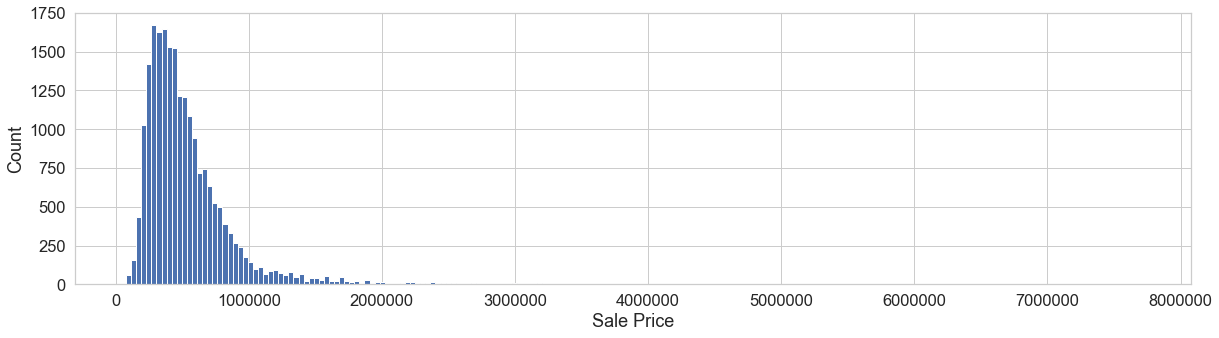

In [6]:
#Visualization 1:
#review the distribution of price 
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

#distribution is skewed to the right

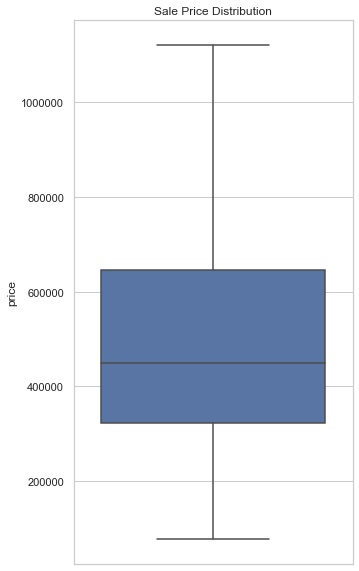

In [7]:
#Visualization 2:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=kc_housing["price"],showfliers=False)
plt.title("Sale Price Distribution")
ax 

In [8]:
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
floors           0.256804
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64


Text(0.5, 1.0, 'Sqft Living Vs Price')

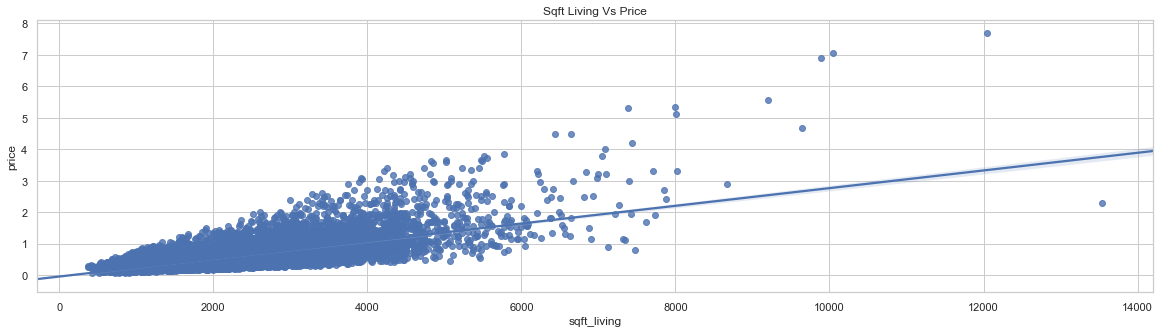

In [9]:
#Visualization 3: 
sqft_living = kc_housing['sqft_living']
price = kc_housing['price']/1000000
sqftliving = pd.DataFrame(kc_housing, columns = ['sqft_living', 'price'])
sns.regplot(x= sqft_living, y=price, data=sqftliving).set_title('Sqft Living Vs Price')

Text(0.5, 1.0, 'House Grade vs Price')

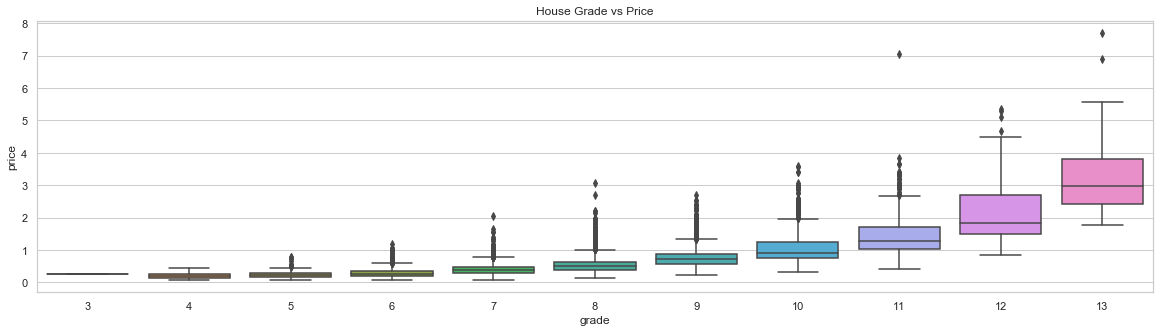

In [10]:
# Visualization 4:
grade = kc_housing['grade']
price= kc_housing['price']/1000000
grade_df = pd.DataFrame(kc_housing, columns = ['grade', 'price'])
sns.boxplot(x= grade, y=price, data=grade_df).set_title('House Grade vs Price')


In [11]:
#Visualization 5
freq_grade = kc_housing['grade'].value_counts()
freq_grade_list = list(freq_grade.head(13).keys())

main_df_grade = []
for n in freq_grade_list:
    main_df_grade.append(kc_housing.loc[(kc_housing['grade'] == n)])
X = grade_price.index
y = grade_price['price']/1000000

main_df_grade = pd.concat(main_df_grade)
grade_price = main_df_grade.groupby(kc_housing['grade']).mean()

grade_price = grade_price.sort_values(by='price',ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

plt.bar(X,y)

# ax.set_xticks(range(len(x)))
# ax.set_xticklabels(x)
plt.xticks(rotation=90)
plt.title('Mean Price by House Grade')
plt.xlabel('Grade')
plt.ylabel('Price (Millions USD)')
plt.savefig('Bar_Chart')
plt.show()

NameError: name 'grade_price' is not defined